<a href="https://colab.research.google.com/github/sujitojha1/ERA1/blob/main/Session8/ERA1_S8_CIFAR10_LayerNorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Module and Models

In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!git clone https://github.com/sujitojha1/ERA1 -q --quiet
!mv ERA1/Session8/*.py .
!rm -rf ERA1
print("Loaded Modules and Models")

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet

# For inline matplotlib plotting
%matplotlib inline

Loaded Modules and Models
  Preparing metadata (setup.py) ... done


## Loading train and test data with transforms and loader functions



In [41]:
from data_loader import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

CUDA availability ? True
Files already downloaded and verified
Files already downloaded and verified


## Exploratory Data Analysis


### Summary Statistics

In [42]:
cifar10.data_summary_stats()

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


### Plotting sample images

Files already downloaded and verified


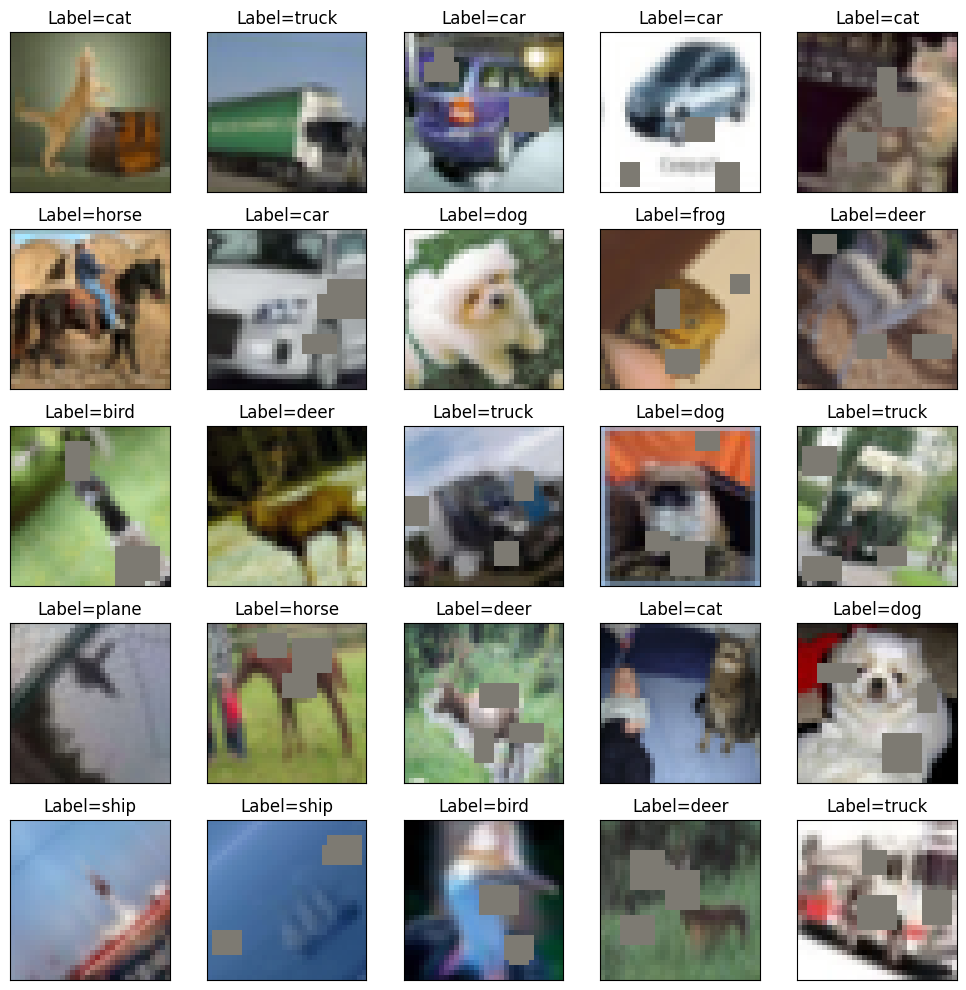

In [43]:
cifar10.sample_pictures(train_flag=True)

## The Model

In [44]:
from model import *

# Loading Custom Model
net = Net(normalizationMethod='LN')

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


## Model Summary



In [45]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
            Conv2d-4           [-1, 64, 32, 32]           9,216
              ReLU-5           [-1, 64, 32, 32]               0
         GroupNorm-6           [-1, 64, 32, 32]             128
            Conv2d-7           [-1, 64, 32, 32]             576
              ReLU-8           [-1, 64, 32, 32]               0
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 16, 32, 32]           1,024
             ReLU-11           [-1, 16, 32, 32]               0
        GroupNorm-12           [-1, 16, 32, 32]              32
    

## Define a Loss function and optimizer

In [46]:
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.2)

## Training and Testing

In [47]:
# Load train and test model
from main import *

train = train()
test = test()

EPOCHS= 20

for epoch in range(EPOCHS):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch)
    scheduler.step()
    test.execute(net, device, testloader, criterion)

print('Finished Training')

Epoch: 0,Loss=1.49 Batch_id=390 Accuracy=34.99: 100%|██████████| 391/391 [00:24<00:00, 15.98it/s]


Test set: Average loss: 0.0115, Accuracy: 4729/10000 (47.29%)



Epoch: 1,Loss=1.26 Batch_id=390 Accuracy=46.19: 100%|██████████| 391/391 [00:20<00:00, 19.16it/s]


Test set: Average loss: 0.0108, Accuracy: 5017/10000 (50.17%)



Epoch: 2,Loss=1.27 Batch_id=390 Accuracy=51.35: 100%|██████████| 391/391 [00:20<00:00, 19.22it/s]


Test set: Average loss: 0.0096, Accuracy: 5593/10000 (55.93%)



Epoch: 3,Loss=1.09 Batch_id=390 Accuracy=54.83: 100%|██████████| 391/391 [00:19<00:00, 19.91it/s]


Test set: Average loss: 0.0086, Accuracy: 6065/10000 (60.65%)



Epoch: 4,Loss=1.06 Batch_id=390 Accuracy=57.51: 100%|██████████| 391/391 [00:20<00:00, 19.37it/s]


Test set: Average loss: 0.0086, Accuracy: 6109/10000 (61.09%)



Epoch: 5,Loss=1.14 Batch_id=390 Accuracy=59.12: 100%|██████████| 391/391 [00:20<00:00, 18.98it/s]


Test set: Average loss: 0.0076, Accuracy: 6523/10000 (65.23%)



Epoch: 6,Loss=0.95 Batch_id=390 Accuracy=63.39: 100%|██████████| 391/391 [00:19<00:00, 19.91it/s]


Test set: Average loss: 0.0072, Accuracy: 6795/10000 (67.95%)



Epoch: 7,Loss=1.05 Batch_id=390 Accuracy=64.21: 100%|██████████| 391/391 [00:19<00:00, 20.57it/s]


Test set: Average loss: 0.0070, Accuracy: 6858/10000 (68.58%)



Epoch: 8,Loss=1.02 Batch_id=390 Accuracy=64.97: 100%|██████████| 391/391 [00:19<00:00, 20.04it/s]


Test set: Average loss: 0.0070, Accuracy: 6851/10000 (68.51%)



Epoch: 9,Loss=0.88 Batch_id=390 Accuracy=64.99: 100%|██████████| 391/391 [00:18<00:00, 21.15it/s]


Test set: Average loss: 0.0069, Accuracy: 6897/10000 (68.97%)



Epoch: 10,Loss=1.27 Batch_id=390 Accuracy=65.49: 100%|██████████| 391/391 [00:18<00:00, 21.20it/s]


Test set: Average loss: 0.0069, Accuracy: 6876/10000 (68.76%)



Epoch: 11,Loss=0.87 Batch_id=390 Accuracy=66.01: 100%|██████████| 391/391 [00:20<00:00, 18.80it/s]


Test set: Average loss: 0.0067, Accuracy: 7029/10000 (70.29%)



Epoch: 12,Loss=1.01 Batch_id=390 Accuracy=66.88: 100%|██████████| 391/391 [00:19<00:00, 20.54it/s]


Test set: Average loss: 0.0065, Accuracy: 7098/10000 (70.98%)



Epoch: 13,Loss=0.83 Batch_id=390 Accuracy=67.03: 100%|██████████| 391/391 [00:18<00:00, 21.08it/s]


Test set: Average loss: 0.0066, Accuracy: 7060/10000 (70.60%)



Epoch: 14,Loss=0.78 Batch_id=390 Accuracy=67.15: 100%|██████████| 391/391 [00:19<00:00, 19.85it/s]


Test set: Average loss: 0.0065, Accuracy: 7119/10000 (71.19%)



Epoch: 15,Loss=0.87 Batch_id=390 Accuracy=67.22: 100%|██████████| 391/391 [00:18<00:00, 20.85it/s]


Test set: Average loss: 0.0065, Accuracy: 7084/10000 (70.84%)



Epoch: 16,Loss=0.98 Batch_id=390 Accuracy=67.36: 100%|██████████| 391/391 [00:18<00:00, 21.16it/s]


Test set: Average loss: 0.0064, Accuracy: 7125/10000 (71.25%)



Epoch: 17,Loss=1.05 Batch_id=390 Accuracy=67.53: 100%|██████████| 391/391 [00:19<00:00, 19.87it/s]


Test set: Average loss: 0.0065, Accuracy: 7134/10000 (71.34%)



Epoch: 18,Loss=0.94 Batch_id=390 Accuracy=67.88: 100%|██████████| 391/391 [00:18<00:00, 21.00it/s]


Test set: Average loss: 0.0064, Accuracy: 7142/10000 (71.42%)



Epoch: 19,Loss=0.86 Batch_id=390 Accuracy=67.91: 100%|██████████| 391/391 [00:18<00:00, 21.08it/s]


Test set: Average loss: 0.0064, Accuracy: 7141/10000 (71.41%)

Finished Training


## Display an image from the test set

Files already downloaded and verified


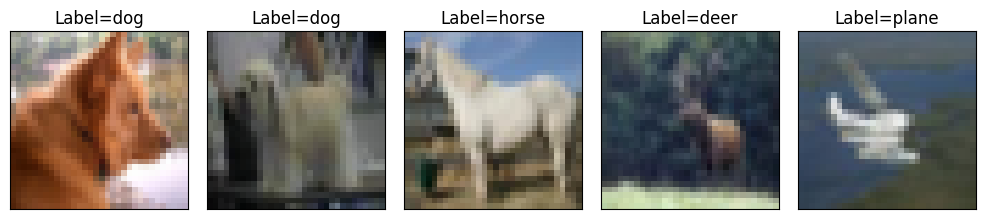

In [48]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

## Prediction of sampe test set

In [49]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:  horse   cat truck  deer plane


## Evaluating Train Accuracy

In [50]:
from evaluate import *
calAccuracy(net, trainloader, device)

Accuracy of the network on the  train images: 67.818 %%


## Evaluating Test Accuracy

In [51]:
calAccuracy(net, testloader, device)

Accuracy of the network on the  train images: 71.41 %%


## Evaluating test Accuracy over different classes

In [52]:
calClassAccuracy(net, testloader,classes, device)

Accuracy of plane : 71 %
Accuracy of   car : 88 %
Accuracy of  bird : 45 %
Accuracy of   cat : 50 %
Accuracy of  deer : 51 %
Accuracy of   dog : 65 %
Accuracy of  frog : 89 %
Accuracy of horse : 71 %
Accuracy of  ship : 80 %
Accuracy of truck : 75 %


## Misclassified Images

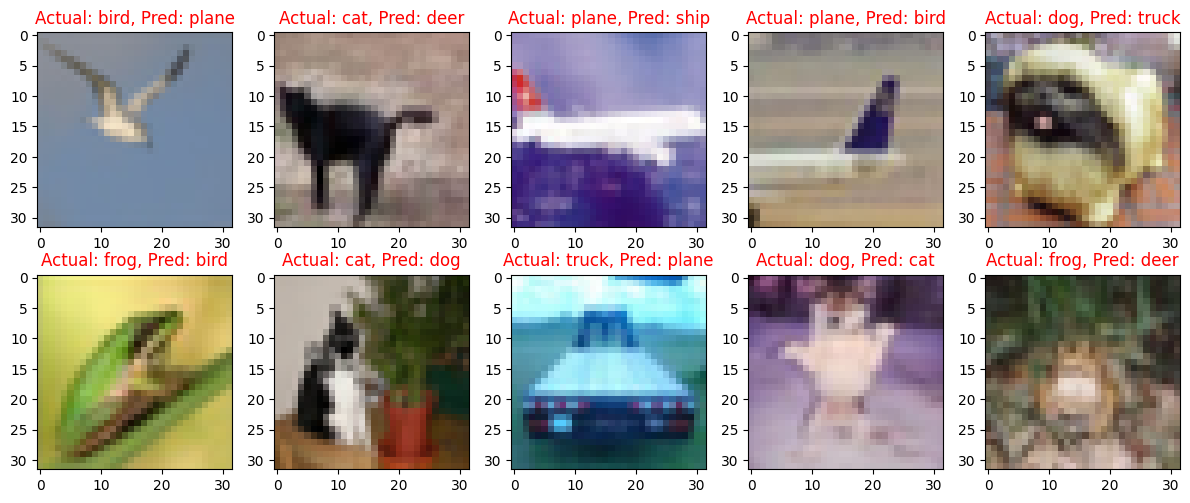

In [53]:
from utils import plot_misclassified_images
plot_misclassified_images(net, testloader, classes, device)